In [6]:
import pandas as pd

print("Pandas imported successfully")


Pandas imported successfully


In [7]:
df = pd.read_excel("online_retail.xlsx")

print("Dataset loaded successfully")

Dataset loaded successfully


# New Section

In [8]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [9]:
df.shape

(541909, 8)

In [10]:

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [13]:
df_clean = df.copy()

print("df_clean created successfully")


df_clean created successfully


In [14]:

df_clean = df_clean.dropna(subset=['CustomerID'])

print("Rows after removing missing CustomerID:", df_clean.shape)

Rows after removing missing CustomerID: (406829, 8)


In [15]:
df.shape
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [16]:
df_clean = df_clean.dropna(subset=['Description'])

print("Rows after removing missing Description:", df_clean.shape)


Rows after removing missing Description: (406829, 8)


In [17]:
df_clean = df_clean.drop_duplicates()

print("Rows after removing duplicates:", df_clean.shape)

Rows after removing duplicates: (401604, 8)


In [18]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

print("CustomerID type:", df_clean['CustomerID'].dtype)


CustomerID type: int64


In [19]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

print("Revenue column created")


Revenue column created


In [20]:
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [21]:
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day

print("Year, Month, Day columns created")


Year, Month, Day columns created


In [22]:
df_clean[df_clean['Quantity'] < 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12,1


In [23]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
 8   Revenue      401604 non-null  float64       
 9   Year         401604 non-null  int32         
 10  Month        401604 non-null  int32         
 11  Day          401604 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 35.2+ MB


In [24]:
df_clean.to_csv("cleaned_retai_data.csv", index=False)

print("Cleaned dataset saved successfully")


Cleaned dataset saved successfully


In [25]:
total_revenue = df_clean['Revenue'].sum()
print("Total Revenue:", round(total_revenue, 2))


Total Revenue: 8278519.42


In [26]:
total_customers = df_clean['CustomerID'].nunique()
print("Total Unique Customers:", total_customers)


Total Unique Customers: 4372


In [27]:
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders:", total_orders)


Total Orders: 22190


In [28]:
aov = total_revenue / total_orders
print("Average Order Value:", round(aov, 2))


Average Order Value: 373.07


In [29]:
top_customers = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

print("top customers are:", top_customers)


top customers are: CustomerID
14646    279489.02
18102    256438.49
17450    187322.17
14911    132458.73
12415    123725.45
14156    113214.59
17511     88125.38
16684     65892.08
13694     62690.54
15311     59284.19
Name: Revenue, dtype: float64


In [30]:
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

print("top country is:", country_revenue.head(10))


top country is: Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Australia          137009.770
Switzerland         55739.400
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: Revenue, dtype: float64


In [31]:
monthly_revenue = df_clean.groupby(['Year','Month'])['Revenue'].sum().reset_index()

monthly_revenue.head()


,Year,Month,Revenue
0,2010,12,552372.860
1,2011,1,473731.900
2,2011,2,435534.070
3,2011,3,578576.210
4,2011,4,425222.671


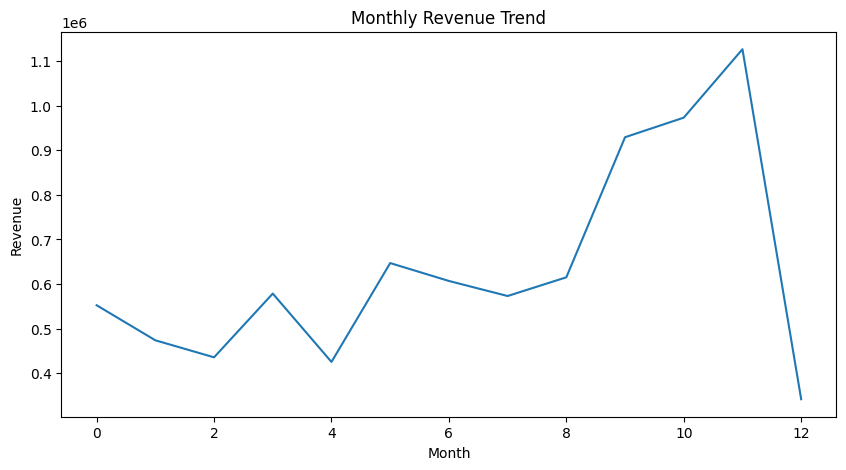

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Revenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()



##Observation:
Revenue increases significantly during November and December.

##Reason:
This may be due to holiday season shopping.

##Business Recommendation:
The company should increase marketing spend before peak season and ensure inventory availability.


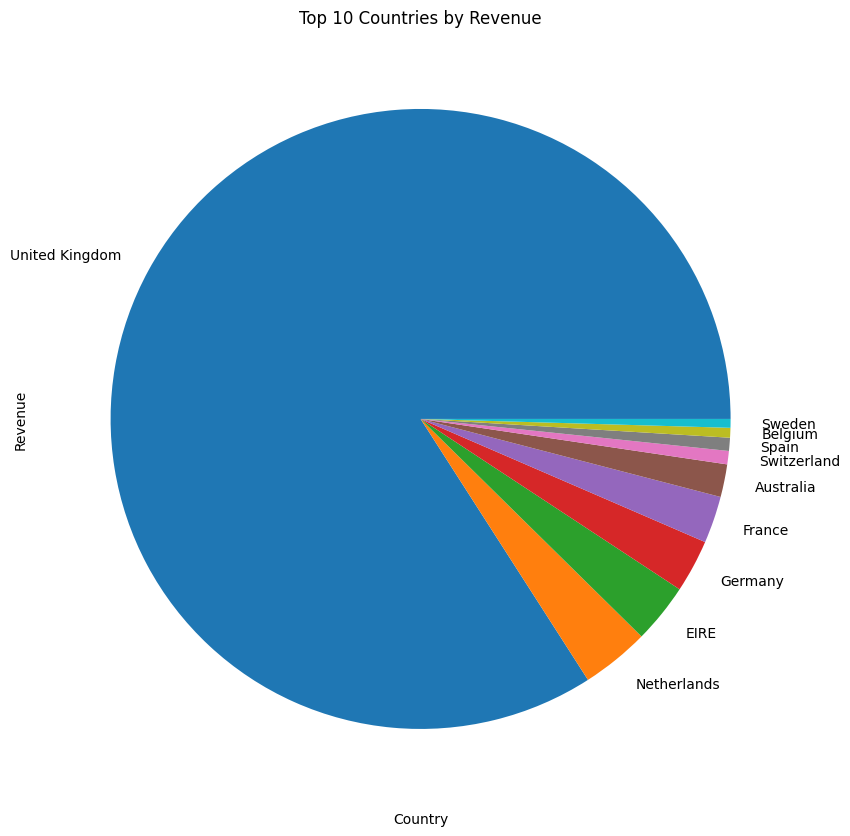

In [33]:
top_countries = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='pie', figsize=(10,15))
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()


##Observation:
United Kingdom contributes majority of total revenue.

##Business Recommendation:
Focus marketing efforts on high-performing regions and explore expansion in similar markets.


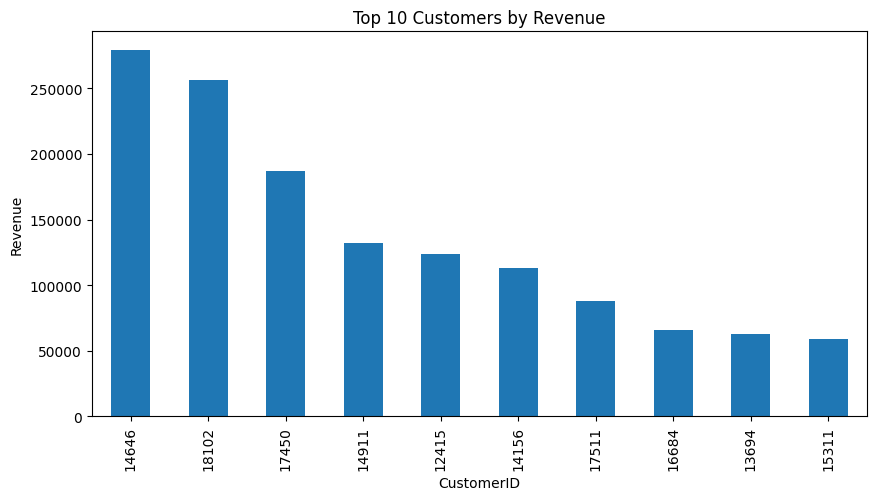

In [34]:
top_customers = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("CustomerID")
plt.ylabel("Revenue")
plt.show()



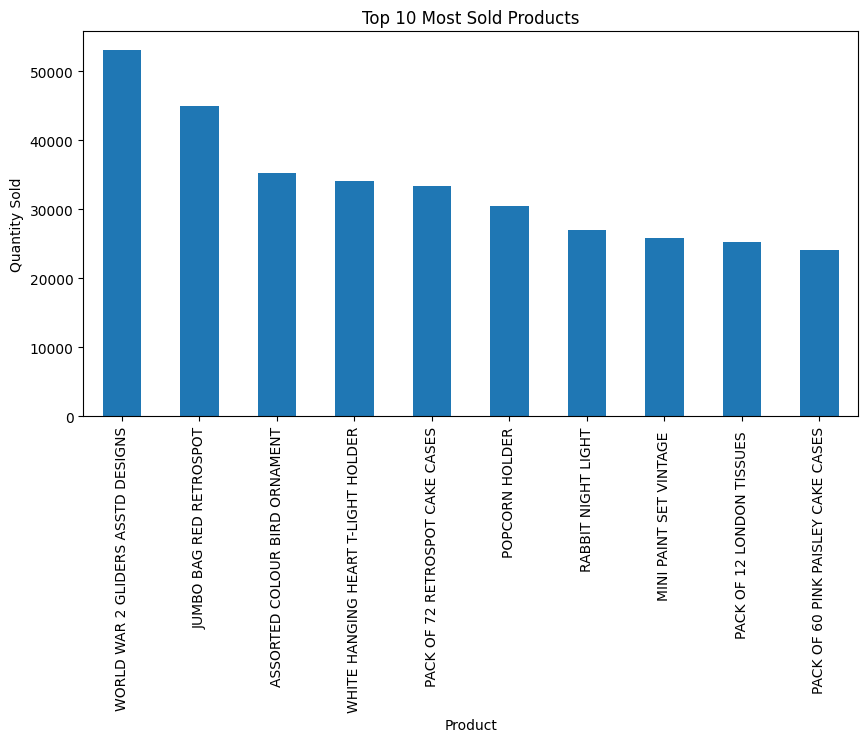

In [35]:
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()



### Observation:
A small number of products contribute significantly to total quantity sold.
These items are the most frequently purchased products.

### Business Insight:
High-selling products are likely core revenue drivers and attract repeat customers.
Demand for these items is consistent and strong.

### Business Recommendation:
- Ensure these products are always in stock.
- Offer bundle deals with complementary items.
- Use these products in promotional campaigns to drive more traffic.
- Analyze profit margins to maximize profitability on high-volume items.


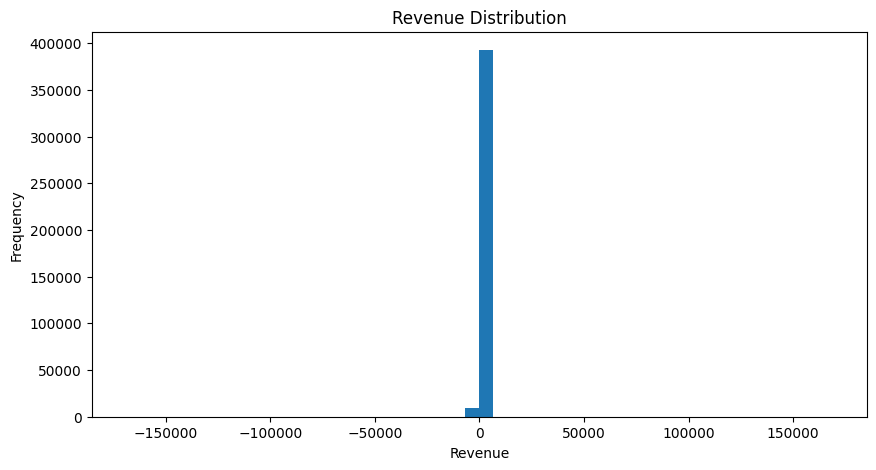

In [36]:
df_clean['Revenue'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.show()


##Observation:
Revenue is highly right-skewed, with a small number of very large transactions.

##Business Insight:
A small percentage of customers contribute disproportionately to total revenue.

In [37]:
import pandas as pd
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_clean.groupby('CustomerID').agg({

    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'

})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


## RFM Analysis

RFM analysis is used to identify valuable customers based on:

###Recency:
How recently customer purchased
###Frequency:
How often customer purchased
###Monetary:
How much customer spent


In [38]:
print(rfm.shape)
print(rfm.head())


(4372, 3)
            Recency  Frequency  Monetary
CustomerID                              
12346           326          2      0.00
12347             2        182   4310.00
12348            75         31   1797.24
12349            19         73   1757.55
12350           310         17    334.40


In [39]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,182,4310.00,5,5,5
12348,75,31,1797.24,2,3,4
12349,19,73,1757.55,4,4,4
12350,310,17,334.40,1,2,2


#####Recency 1–20 → Score 5
#####Recency 21–50 → Score 4
#####Recency 51–100 → Score 3
#####Recency 101–200 → Score 2
#####Recency 200+ → Score 1
####Lower Recency = Higher Score

######similar for frequency and monetary but in descending order
## RFM Scoring

Customers were scored from 1 to 5 based on Recency, Frequency, and Monetary value.

Score 5 represents best customers and Score 1 represents least valuable customers.

RFM_Score = "555" -
This is the best customer.

In [40]:
rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,182,4310.00,5,5,5
12348,75,31,1797.24,2,3,4
12349,19,73,1757.55,4,4,4
12350,310,17,334.40,1,2,2


In [41]:
def segment_customer(row):

    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Champions'

    elif row['F_score'] >= 4:
        return 'Loyal Customers'

    elif row['R_score'] >= 4:
        return 'Recent Customers'

    elif row['R_score'] <= 2:
        return 'At Risk'

    else:
        return 'Regular Customers'


rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,Segment
CustomerID,,,,,,,
12346,326,2,0.00,1,1,1,At Risk
12347,2,182,4310.00,5,5,5,Champions
12348,75,31,1797.24,2,3,4,At Risk
12349,19,73,1757.55,4,4,4,Champions
12350,310,17,334.40,1,2,2,At Risk


In [42]:
rfm['Segment'].value_counts()


,count
Segment,
At Risk,1430
Champions,942
Loyal Customers,807
Recent Customers,671
Regular Customers,522


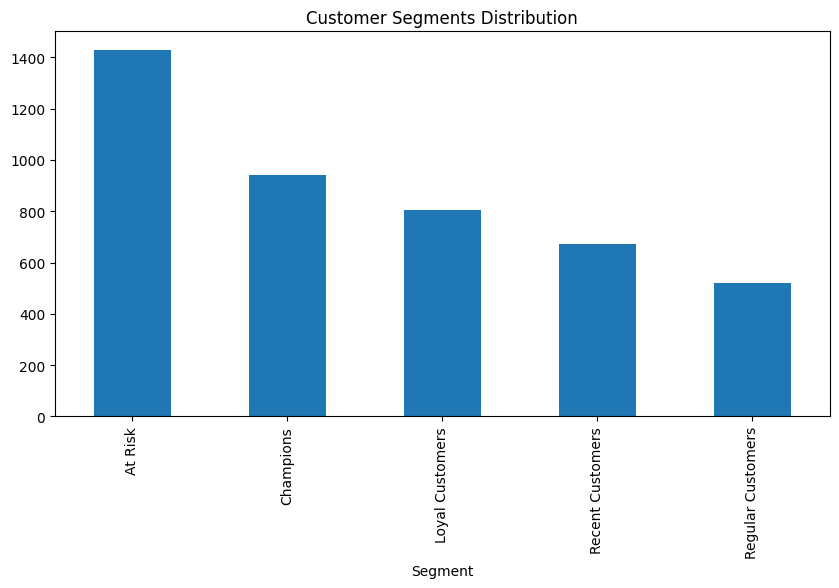

In [43]:
rfm['Segment'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Customer Segments Distribution")
plt.show()


## Customer Segmentation Analysis

Customers were segmented using RFM analysis into Champions, Loyal Customers, Recent Customers, and At Risk Customers.

###Observation:
Champions represent the most valuable customers with recent, frequent, and high-value purchases.

###Business Recommendation:
The company should focus on retaining Champions and Loyal Customers through loyalty programs, while targeting At Risk customers with re-engagement campaigns.


In [44]:
df_clean.to_csv("cleaned_retail_data.csv", index=False)


In [45]:
rfm.to_csv("rfm_customer_segments.csv")


In [47]:
sample_df = df_clean.sample(n=10000, random_state=42)
sample_df.to_csv("cleaned_retail_data_sample.csv", index=False)
